In [ ]:
from PIL import Image
from IPython.display import display
import os


def import_image(image_path):
  """Imports an image from the specified path using Pillow library.

  Args:
    image_path: The path to the image file.

  Returns:
    A PIL Image object if successful, otherwise None.
  """
  base_path = "/content/drive/MyDrive/Child Generator/normalised"
  image_path = os.path.join(base_path, image_path)
  try:
    img = Image.open(image_path)
    return img
  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    return None
  except Exception as e:
    print(f"Error loading image: {e}")
    return None

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Child Generator/CSVs/checkpoint10.csv")
for list_col_name in ["mother_images", "father_images", "child_images"]:
  df[list_col_name] = df[list_col_name].map(eval)

df.head(1)

,family_id,father_name,father_images,mother_name,mother_images,child_name,child_images
0,0,Barack_Obama,"[Barack_Obama_00001.jpg, Barack_Obama_00002.jp...",Michelle_Obama,"[Michelle_Obama_00001.jpg, Michelle_Obama_0000...",Malia_Ann_Obama,"[Malia_Ann_Obama_00001.jpg, Malia_Ann_Obama_00..."


In [ ]:
first_row = df.iloc[0]
images = first_row["father_images"]

for image in images:
  print(image)



Barack_Obama_00001.jpg
Barack_Obama_00002.jpg
Barack_Obama_00003.jpg
Barack_Obama_00004.jpg
Barack_Obama_00005.jpg
Barack_Obama_00006.jpg
Barack_Obama_00007.jpg
Barack_Obama_00008.jpg
Barack_Obama_00009.jpg
Barack_Obama_00010.jpg
Barack_Obama_00011.jpg
Barack_Obama_00012.jpg
Barack_Obama_00013.jpg
Barack_Obama_00014.jpg
Barack_Obama_00015.jpg
Barack_Obama_00016.jpg
Barack_Obama_00017.jpg
Barack_Obama_00018.jpg
Barack_Obama_00019.jpg
Barack_Obama_00020.jpg
Barack_Obama_00021.jpg
Barack_Obama_00022.jpg
Barack_Obama_00023.jpg
Barack_Obama_00024.jpg
Barack_Obama_00025.jpg
Barack_Obama_00026.jpg
Barack_Obama_00027.jpg
Barack_Obama_00028.jpg
Barack_Obama_00029.jpg
Barack_Obama_00030.jpg
Barack_Obama_00031.jpg
Barack_Obama_00032.jpg
Barack_Obama_00033.jpg
Barack_Obama_00034.jpg
Barack_Obama_20035.jpg
Barack_Obama_20036.jpg
Barack_Obama_20037.jpg
Barack_Obama_20038.jpg
Barack_Obama_20039.jpg
Barack_Obama_20040.jpg
Barack_Obama_20041.jpg
Barack_Obama_20042.jpg
Barack_Obama_20043.jpg
Barack_Obam

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   family_id      268 non-null    int64 
 1   father_name    268 non-null    object
 2   father_images  268 non-null    object
 3   mother_name    268 non-null    object
 4   mother_images  268 non-null    object
 5   child_name     268 non-null    object
 6   child_images   268 non-null    object
dtypes: int64(1), object(6)
memory usage: 14.8+ KB


In [ ]:
import random
family_data = df[df['family_id'] == 0].iloc[0]
father_images = random.sample(family_data['father_images'], min(6, len(family_data['father_images'])))

print(father_images)

['Barack_Obama_20345.jpg', 'Barack_Obama_20360.jpg', 'Barack_Obama_20374.jpg', 'Barack_Obama_20240.jpg', 'Barack_Obama_20275.jpg', 'Barack_Obama_20148.jpg']


In [ ]:
import random

def get_family(family_id):
  """
  Retrieves family information for a given family ID.

  Args:
    family_id: The ID of the family.

  Returns:
    A dictionary containing family information, or None if the family ID is not found.
  """
  try:
    df = pd.read_csv("/content/drive/MyDrive/Child Generator/CSVs/checkpoint10.csv")
    for list_col_name in ["mother_images", "father_images", "child_images"]:
        df[list_col_name] = df[list_col_name].map(eval)

    family_data = df[df['family_id'] == family_id].iloc[0]

    no_father_images = len(family_data['father_images'])
    no_mother_images = len(family_data['mother_images'])
    no_child_images = len(family_data['child_images'])

    no_of_images = min(no_father_images, no_mother_images, no_child_images)

    father_images = random.sample(family_data['father_images'], k=min(no_of_images, len(family_data['father_images'])))
    mother_images = random.sample(family_data['mother_images'], k=min(no_of_images, len(family_data['mother_images'])))
    child_images = random.sample(family_data['child_images'], k=min(no_of_images, len(family_data['child_images'])))

    family_info = {
        'father_images': father_images,
        'mother_images': mother_images,
        'child_images': child_images,
        'Father_name': family_data['father_name'],
        'Mother_name': family_data['mother_name'],
        'Child_name': family_data['child_name']
    }
    return family_info
  except IndexError:
    print(f"Family with ID {family_id} not found.")
    return None

In [ ]:
fathers = []
mothers = []
children = []

for i in range(1):
  family = get_family(i)
  father_images = family.get('father_images')
  for father_image in father_images:
    fathers.append(father_image)


In [ ]:
fathers = []
mothers = []
children = []

for i in range(267):
  family = get_family(i)
  father_images = family.get('father_images')
  mother_images = family.get('mother_images')
  children_images = family.get('child_images')

  for i in range(min(len(father_images), len(mother_images), len(children_images))):
    fathers.append(father_images[i])
    mothers.append(mother_images[i])
    children.append(children_images[i])

print(fathers)
print(len(mothers))
print(len(children))

1994
1994
1994


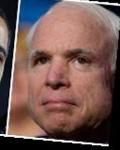

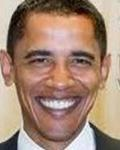

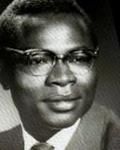

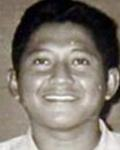

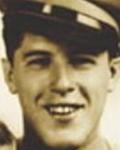

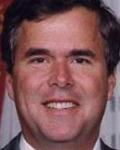

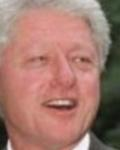

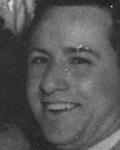

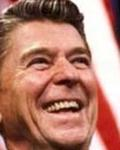

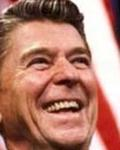

In [ ]:
"""
Sample usage of the get_family and import image functions
"""

fathers = []
for i in range(10):
  fathers.append(get_family(i, no_of_images=1).get('father_images'))

for father in fathers:
  img1 = import_image(father[0])
  display(img1)

In [ ]:
"""
Sample usage to get a path for say 3 trios
"""

fathers = []
mothers = []
children = []

for i in range(3):
  family = get_family(i, no_of_images=1)
  fathers.append(family.get('father_images'))
  mothers.append(family.get('mother_images'))
  children.append(family.get('child_images'))

print(fathers)
print(mothers)
print(children)

[['Families/Obama/Barack_Obama/Barack_Obama_20154.jpg'], ['Families/Obama/Barack_Obama/Barack_Obama_20359.jpg'], ['Families/Obama/Barack_Obama_Sr/Barack_Obama_Sr_00004.jpg']]
[['Families/Obama/Michelle_Obama/Michelle_Obama_00020.jpg'], ['Families/Obama/Michelle_Obama/Michelle_Obama_00006.jpg'], ['Families/Obama/Ann_Dunham/Ann_Dunham_00002.jpg']]
[['Families/Obama/Malia_Ann_Obama/Malia_Ann_Obama_00017.jpg'], ['Families/Obama/Natasha_Obama/Natasha_Obama_00008.jpg'], ['Families/Obama/Barack_Obama/Barack_Obama_20367.jpg']]


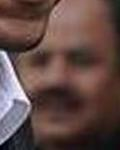

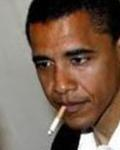

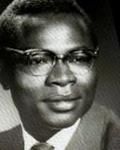

In [ ]:
"""
Sample usage to get an image from a path without calling import image
"""

def append_to_base_path(path):
  base_path = "/content/drive/MyDrive/Child Generator/"
  return os.path.join(base_path, path)

for father in fathers:
  img1 = Image.open(append_to_base_path(father[0]))
  display(img1)

